<a href="https://colab.research.google.com/github/blakedshull/datascience/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
set_config(display='diagram')

In [122]:
filename = '/content/sales_predictions.csv'

In [123]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [124]:
df.shape

(8523, 12)

In [125]:
df.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [126]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [127]:
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [128]:
# No duplicates

In [129]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here is where Part 5 begins

I dropped Item ID from the model because it is unique to each value and non-numerical, it will have no predictive power.  I dropped weight and outlet size because of significant numbers of missing values which cannot be reliably assumed.  

In [130]:
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Item_Weight'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [131]:
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(train_cat_data)
train_ohe = ohe.transform(train_cat_data)
test_ohe = ohe.transform(test_cat_data)

In [132]:
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...
5734,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,Low Fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,low fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [133]:
ohe_column_names = ohe.get_feature_names_out(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [134]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [135]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [136]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bfef8e390>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bfc748550>)])

In [137]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bfef8e390>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bfc748550>)])

In [138]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

array([[-0.71277507,  1.82810922,  1.32784893, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.60336888,  1.32784893, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.24454056,  0.13618724, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.92052713,  1.52302674,  0.49368575, ...,  1.        ,
         0.        ,  0.        ],
       [-0.2277552 , -0.38377708,  1.0895166 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95867683, -0.73836105, -0.10214509, ...,  1.        ,
         0.        ,  0.        ]])

In [139]:
freq_imputer = SimpleImputer(strategy='constant', fill_value= 'Unknown')
median_imputer = SimpleImputer(strategy='median')

In [140]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [141]:
dec_tree = DecisionTreeRegressor(max_depth=1)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bfef8e390>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bfc748550>)])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])

In [142]:
num_selector = make_column_selector(dtype_include='number')
train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)
X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
X_train_processed

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.029565,256.4646,2009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,179.7660,2009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.158716,157.2946,1999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.014628,82.3250,2004,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.016645,120.9098,2002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.286345,139.1838,1998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.117575,75.6670,2007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,0.018944,237.3590,2002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,0.054363,117.9466,2007,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [143]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_train_processed)

In [144]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.23722683435003833


In [145]:
def evaluate_regression(y_true, y_pred):
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

,Test Score,Train Score
5,0.594757,0.603917
6,0.585742,0.615035
4,0.584005,0.582625
7,0.579384,0.626688
8,0.560857,0.642899


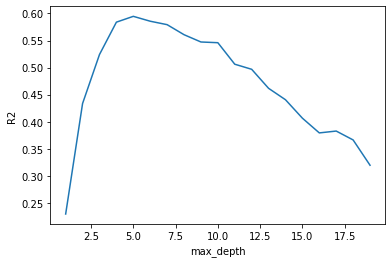

In [146]:
depths = list(range(1, 20))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

In [147]:
best_depth = scores.index[0]
dec_tree_fin = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_fin.fit(X_train_processed, y_train)
train_7_score = dec_tree_fin.score(X_train_processed, y_train)
test_7_score = dec_tree_fin.score(X_test_processed, y_test)
print(f'Train R2 score: {train_7_score}')
print(f'Test R2 score:{test_7_score}')

Train R2 score: 0.6039173630691319
Test R2 score:0.5947572077228882


In [148]:
print('Training')
evaluate_regression(y_train, dec_tree_fin.predict(X_train_processed))
print('Testing')
evaluate_regression(y_test, dec_tree_fin.predict(X_test_processed))

Training
scores: 
MAE: 762.55 
MSE: 1,172,189.02 
RMSE: 1,082.68 
R2: 0.60
Testing
scores: 
MAE: 738.18 
MSE: 1,118,055.66 
RMSE: 1,057.38 
R2: 0.59


In [149]:
lin_reg_pipe = make_pipeline(preprocessor, LinearRegression())
lin_reg_pipe.fit(X_train, y_train);

print('Train Evaluation')
evaluate_regression(y_train, lin_reg_pipe.predict(X_train))

print('\nTest Evaluation')
evaluate_regression(y_test, lin_reg_pipe.predict(X_test))

Train Evaluation
scores: 
MAE: 847.18 
MSE: 1,297,287.58 
RMSE: 1,138.99 
R2: 0.56

Test Evaluation
scores: 
MAE: 804.07 
MSE: 1,194,393.36 
RMSE: 1,092.88 
R2: 0.57


The linear regression looks like it has a worse R2.  

In the dec tree, the R2s are not good, only 60% of the variance is explainable by the model in the training sample or test sample.  The mean average errors are pretty bad as well, the training being 35% and test being 34%.  The RMSEs are even worse, with errors of almost 50% for the training and the test.  This means that the model's predictive capabilities are being hurt by outliers, and is generally very weak.  It is clear, looking at the correlation heatmap below, that there isn't a lot of strong correlation, so this is expected.

All that said, the linear regression has higher variance and a lower R2

In [150]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [151]:
bagreg = BaggingRegressor(random_state = 42)
bagreg.fit(X_train_processed, y_train)

BaggingRegressor(random_state=42)

In [152]:
bagreg_train_score = bagreg.score(X_train_processed, y_train)
bagreg_test_score = bagreg.score(X_test_processed, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.918317547787967
0.5365478413245153


On first blush, looks to be high variance

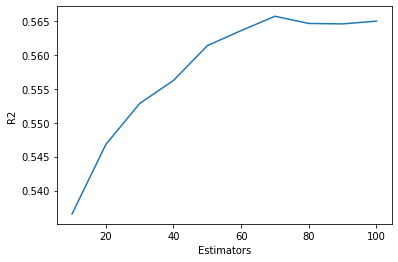

In [153]:
estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bag_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train_processed, y_train)
   bag_train_score = bag_reg.score(X_train_processed, y_train)
   bag_test_score = bag_reg.score(X_test_processed, y_test)
   bag_scores.loc[num_estimators, 'Train Score'] = bag_train_score
   bag_scores.loc[num_estimators, 'Test Score'] = bag_test_score

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores['Test Score'])
plt.show()

In [154]:
bag_scores = bag_scores.sort_values(by='Test Score', ascending=False)
bag_scores

,Train Score,Test Score
70,0.936588,0.565699
100,0.937755,0.564973
80,0.937018,0.564635
90,0.937332,0.56457
60,0.936122,0.563584
50,0.935468,0.561358
40,0.933944,0.55623
30,0.932222,0.552837
20,0.926897,0.546793
10,0.918318,0.536548


In [155]:
best_estimator = bag_scores.index[0]
bag_reg_tuned = BaggingRegressor(n_estimators=best_estimator,)
bag_reg_tuned.fit(X_train_processed, y_train)

print(f'Train R2 score: {bag_reg_tuned.score(X_train_processed, y_train)}')
print(f'Test R2 score: {bag_reg_tuned.score(X_test_processed, y_test)}')

Train R2 score: 0.9365551696813829
Test R2 score: 0.5585739477441627


I was just curious, it looks higher variance but like it has good potential.  We haven't learned all regularization tools but I plan to come back to this.

In [156]:
df = df.drop(columns=["Item_Weight"])
df['Outlet_Size'].fillna('Unknown', inplace=True)
df.isna().sum()

# I chose to drop Item_Weight because the unknown values represent 17% of the data.  Dropping the rows would lose us too much valuable sales data.  Imputing any value would skew the data to the point of unreliability.  Even inputting the mean or median throws off median or mean respectively, as well as our variability and confidence intervals of any analyses we might do.  The column is already not useful unless we wanted to delete the rows, and the rows are more important.  Multivariate or k-NN looked viable but I do not understand them well enough yet.
# I chose to fill in "Unknown" for Outlet_Size because it is already categorical data, so I would not throw off any numbers.  One value is not so overwhelmingly common that I would use the mode as a fill, and deleting the rows loses us over a quarter of our values.  Deleting the column would be my next choice, but there is no harm in simply filling it with "Unknown" and keeping the rest of the data.

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [157]:
df.dtypes 

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [158]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [159]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [160]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [161]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [162]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [163]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [164]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [165]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [166]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [167]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [168]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [169]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Items')

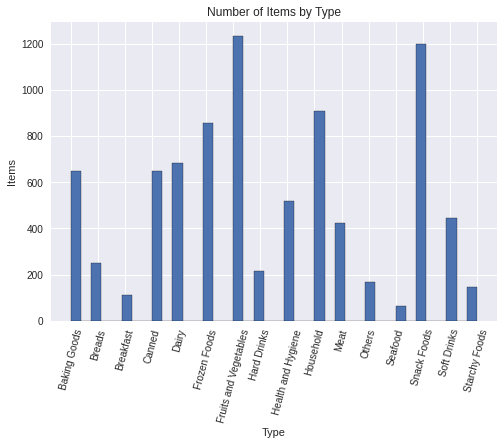

In [171]:
plt.style.use('seaborn')
alphabetized = df.sort_values('Item_Type')
alphabetized = alphabetized.sort_values('Item_Type')
alphabetized['Item_Type'].hist(bins = 40,
                                   edgecolor='black')
plt.xticks(rotation = 75)
plt.title("Number of Items by Type")
plt.xlabel("Type")
plt.ylabel("Items")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

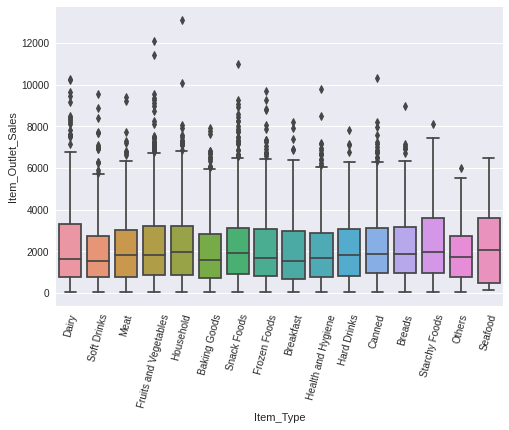

In [172]:
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 75)

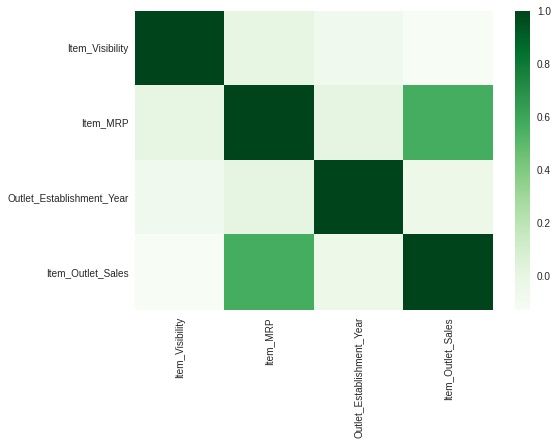

In [173]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens')

In [174]:
print(corr)

                           Item_Visibility  Item_MRP  \
Item_Visibility                   1.000000 -0.001315   
Item_MRP                         -0.001315  1.000000   
Outlet_Establishment_Year        -0.074834  0.005020   
Item_Outlet_Sales                -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


Text(0, 0.5, 'Sales')

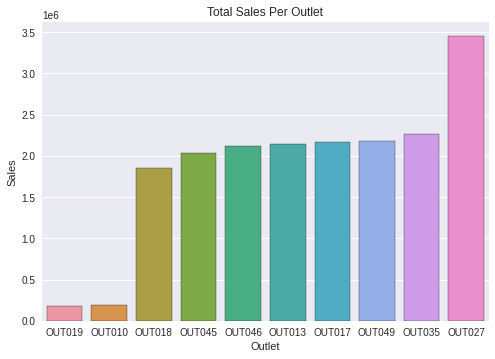

In [175]:
plt.style.use('seaborn')
sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()
sales_by_outlet = sales_by_outlet.sort_values(by = 'Item_Outlet_Sales')
sns.barplot(data = sales_by_outlet, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', edgecolor='black')
plt.title("Total Sales Per Outlet")
plt.xlabel("Outlet")
plt.ylabel("Sales")

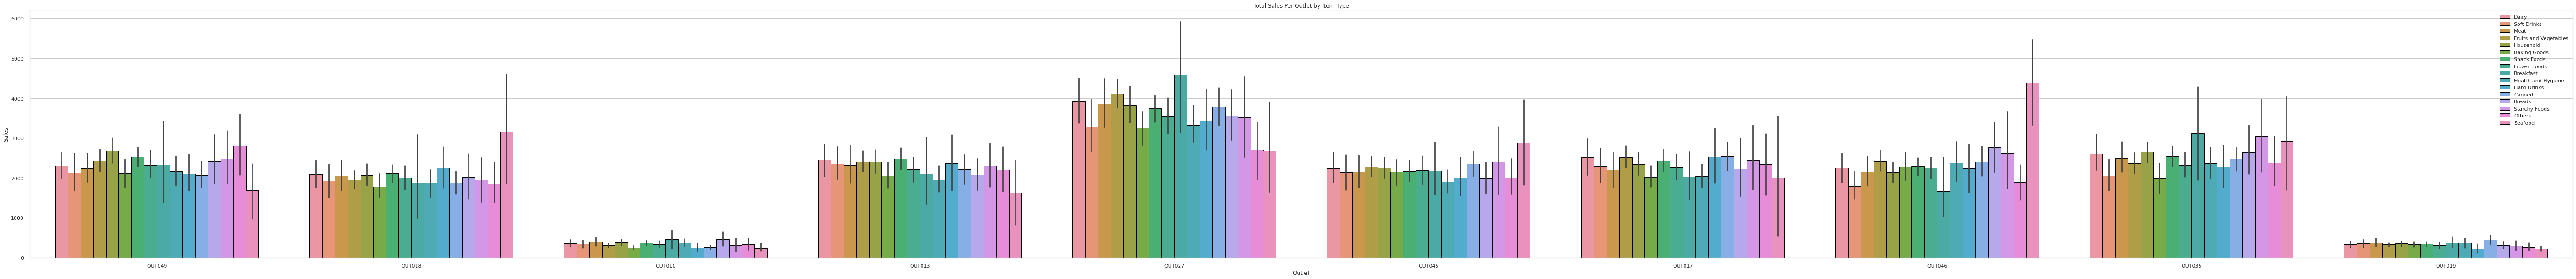

In [176]:
# Zoom and scroll to see, its a big graph!
plt.style.use('seaborn')
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(100,10)) # From https://learningactors.com/how-to-make-better-looking-charts-in-python/
sns.barplot(data = df, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', hue = 'Item_Type', edgecolor='black', )
plt.title("Total Sales Per Outlet by Item Type")
plt.xlabel("Outlet")
plt.ylabel("Sales")
plt.legend(bbox_to_anchor = (1,1))
plt.show()


Text(0, 0.5, 'Sales')

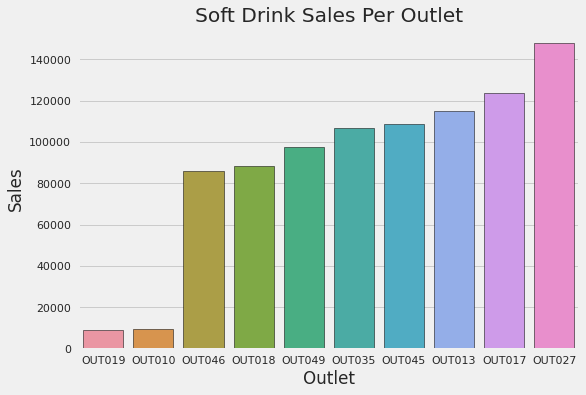

In [177]:
filter = df[df['Item_Type'] == 'Soft Drinks']
plt.style.use('fivethirtyeight')
sales_by_outlet = filter.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()
sales_by_outlet = sales_by_outlet.sort_values(by = 'Item_Outlet_Sales')
sns.barplot(data = sales_by_outlet, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', edgecolor='black')
plt.title("Soft Drink Sales Per Outlet")
plt.xlabel("Outlet")
plt.ylabel("Sales")

# If a sugary drink tax were to pass this graph does a good job showing which ones would be most affected aggregate.  But in order to find out the 
# full context, we need to understand soft drink sales as a percent of their total sales.  I'll be analyzing the top outlet against an average sales one and 
# the bottom sales one to see if outlet 27 just sells more items, or if it is proportionally in trouble.

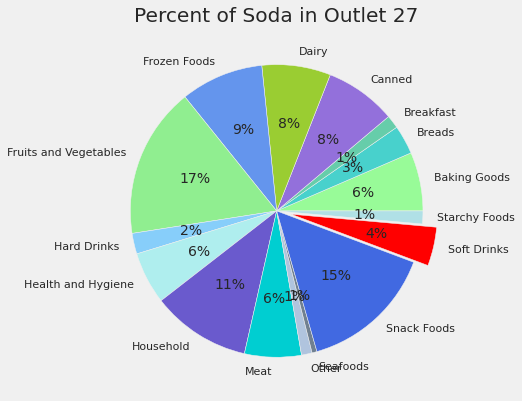

In [178]:
filter2 = df[df['Outlet_Identifier'] == 'OUT027']
soda = filter2.groupby('Item_Type')['Item_Outlet_Sales'].sum()

plt.pie(soda, autopct='%1.0f%%', # Got some of this from here https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
        colors = ['palegreen', 'mediumturquoise', 'mediumaquamarine', 'mediumpurple', 'yellowgreen', 'cornflowerblue', 'lightgreen', 'lightskyblue', 'paleturquoise', 'slateblue', 'darkturquoise', 'lightsteelblue', 'slategrey', 'royalblue', 'red', 'powderblue'],
        labels = ['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Other', 'Seafoods', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
        explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0.1, 0))
plt.tight_layout()
plt.title('Percent of Soda in Outlet 27')
plt.rcParams['patch.linewidth'] = 1 # Got this line of code from here: https://stackoverflow.com/questions/20551477/changing-line-properties-in-matplotlib-pie-chart 

# When comparing the three pie charts (sorry, I do not know how to do them side by side) it becomes clear that the sugary drink tax would probably not disproportionately affect anyone, and that
# instead they all sell soft drinks relative to their size.  However, if we're looking at aggregate numbers, Outlet 27 would still be hit hardest and 19 least hard hit.

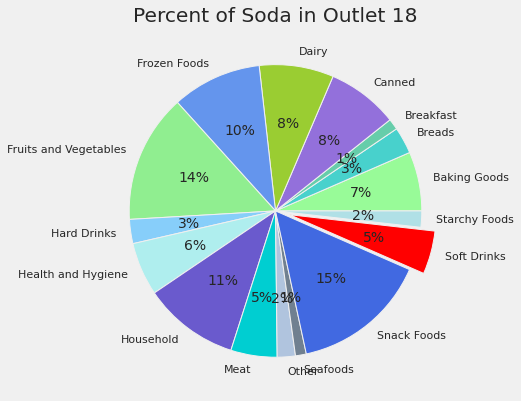

In [179]:
filter3 = df[df['Outlet_Identifier'] == 'OUT018']
soda = filter3.groupby('Item_Type')['Item_Outlet_Sales'].sum()

plt.pie(soda, autopct='%1.0f%%', # Got some of this from here https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
        colors = ['palegreen', 'mediumturquoise', 'mediumaquamarine', 'mediumpurple', 'yellowgreen', 'cornflowerblue', 'lightgreen', 'lightskyblue', 'paleturquoise', 'slateblue', 'darkturquoise', 'lightsteelblue', 'slategrey', 'royalblue', 'red', 'powderblue'],
        labels = ['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Other', 'Seafoods', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
        explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0.1, 0))
plt.tight_layout()
plt.title('Percent of Soda in Outlet 18')
plt.rcParams['patch.linewidth'] = 1 # Got this line of code from here: https://stackoverflow.com/questions/20551477/changing-line-properties-in-matplotlib-pie-chart 

# When comparing the three pie charts (sorry, I do not know how to do them side by side) it becomes clear that the sugary drink tax would probably not disproportionately affect anyone, and that
# instead they all sell soft drinks relative to their size.  However, if we're looking at aggregate numbers, Outlet 27 would still be hit hardest and 19 least hard hit.

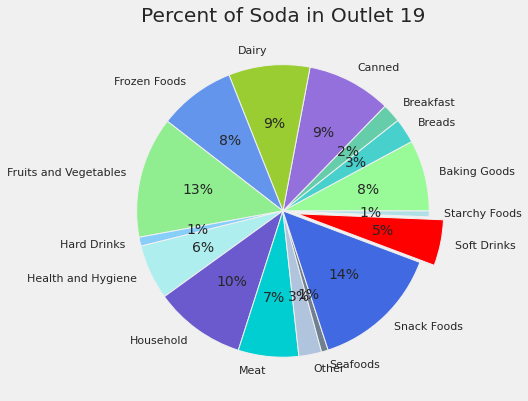

In [180]:
filter = df[df['Outlet_Identifier'] == 'OUT019']
soda = filter.groupby('Item_Type')['Item_Outlet_Sales'].sum()

plt.pie(soda, autopct='%1.0f%%', # Got some of this from here https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
        colors = ['palegreen', 'mediumturquoise', 'mediumaquamarine', 'mediumpurple', 'yellowgreen', 'cornflowerblue', 'lightgreen', 'lightskyblue', 'paleturquoise', 'slateblue', 'darkturquoise', 'lightsteelblue', 'slategrey', 'royalblue', 'red', 'powderblue'],
        labels = ['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Other', 'Seafoods', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
        explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0.1, 0))
plt.tight_layout()
plt.title('Percent of Soda in Outlet 19')
plt.rcParams['patch.linewidth'] = 1 # Got this line of code from here: https://stackoverflow.com/questions/20551477/changing-line-properties-in-matplotlib-pie-chart 

# When comparing the three pie charts (sorry, I do not know how to do them side by side) it becomes clear that the sugary drink tax would probably not disproportionately affect anyone, and that
# instead they all sell soft drinks relative to their size.  However, if we're looking at aggregate numbers, Outlet 27 would still be hit hardest and 19 least hard hit.

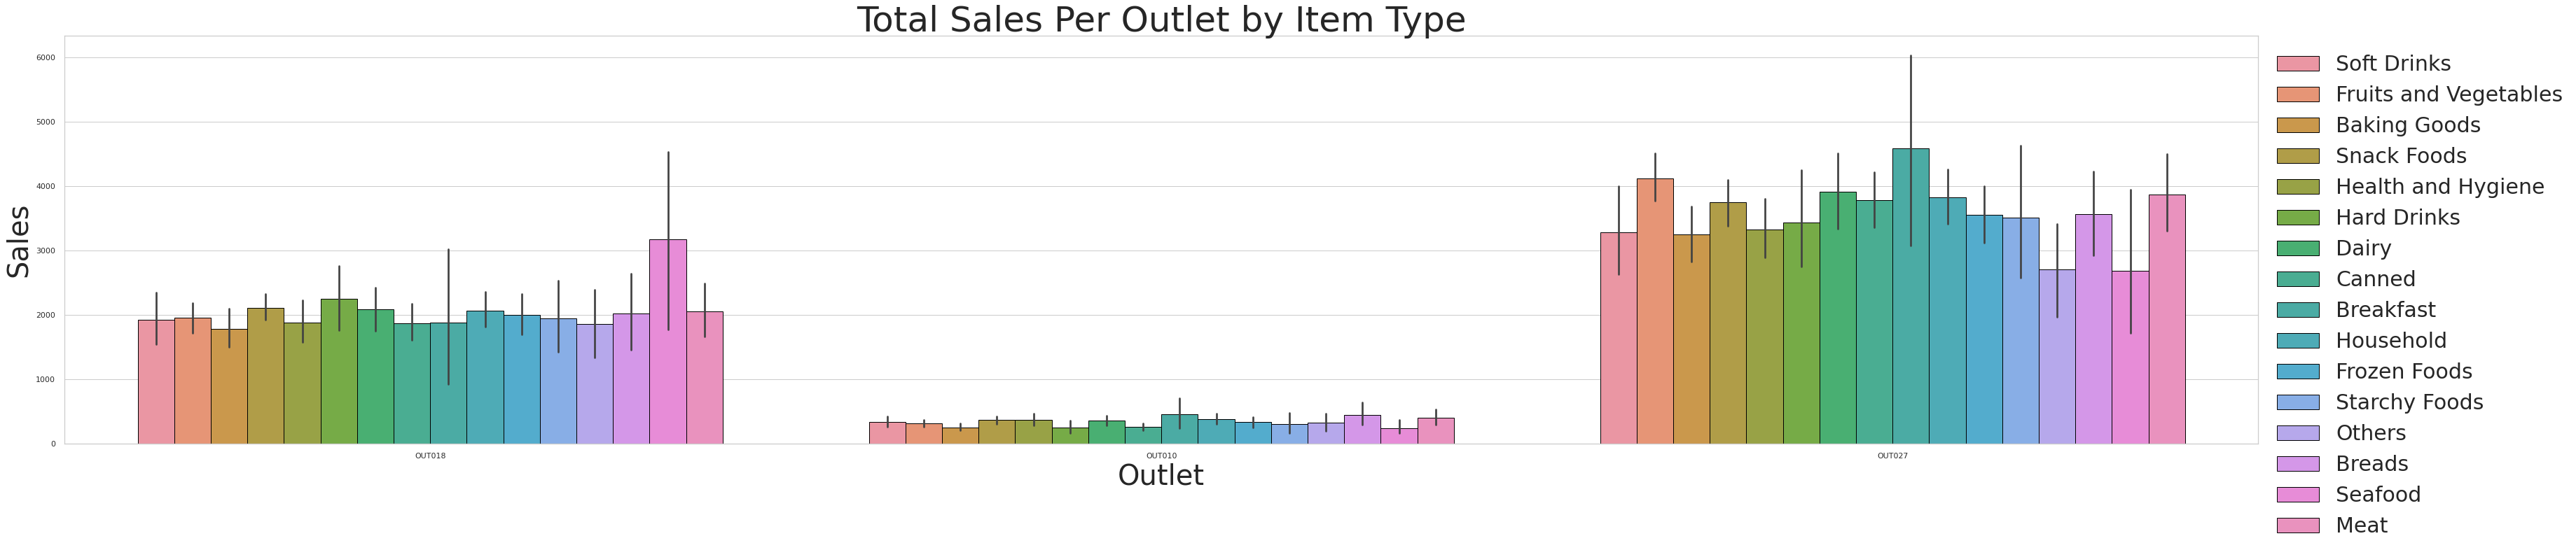

In [181]:
# Zoom and scroll to see, its a big graph!
filterx = df[(df['Outlet_Identifier'] == 'OUT027') | (df['Outlet_Identifier'] == 'OUT018') | (df['Outlet_Identifier'] == 'OUT010')]
plt.style.use('seaborn')
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(50,10)) # From https://learningactors.com/how-to-make-better-looking-charts-in-python/
sns.barplot(data = filterx, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', hue = 'Item_Type', edgecolor='black', )
plt.title("Total Sales Per Outlet by Item Type", fontsize=50)
plt.xlabel("Outlet", fontsize = 40)
plt.ylabel("Sales", fontsize = 40)
plt.legend(bbox_to_anchor = (1,1), fontsize = 30)
plt.show()

# This bar graph also visualizes teh total sales of the outlets above against each other.